In [13]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colorbar as mcb
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from helpers_plot import initPlot, finalizePlot

In [14]:
initPlot(legendsize=18)


In [15]:
def get_bootstrap_error_cov(map3, B):
    Nthetas=map3.shape[0]
    Nrealisations=map3.shape[1]

    bootstrapCovs=np.zeros((B, Nthetas, Nthetas))

    for b in range(B):
        indices=np.random.randint(0, Nrealisations, Nrealisations)
        map3_tmp=map3[:,indices]
        bootstrapCovs[b]=np.cov(map3_tmp)

    return np.std(bootstrapCovs, axis=0)

In [16]:
# Load Data
dir_slics="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16/"

cov_T1inf=np.loadtxt(dir_slics+"cov_infinite_term1Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
cov_T2=np.loadtxt(dir_slics+"cov_square_term2Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")

cov_T4=np.loadtxt(dir_slics+"cov_infinite_term4Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
  

cov_T5=np.loadtxt(dir_slics+"cov_infinite_term5Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")


cov_T6=np.loadtxt(dir_slics+"cov_square_term6Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")


cov_T7=np.loadtxt(dir_slics+"cov_infinite_term7Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")

cov_ssc=np.loadtxt(dir_slics+"SSC_cov_square_term7Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")

map3=np.load(dir_slics+"map_cubed.npy")

cov_fft=np.cov(map3)
err_fft=get_bootstrap_error_cov(map3, 10000)

In [17]:
# Set Thetas labels
thetas_ind = np.array([[4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4,16,16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

# Plot Heatmap

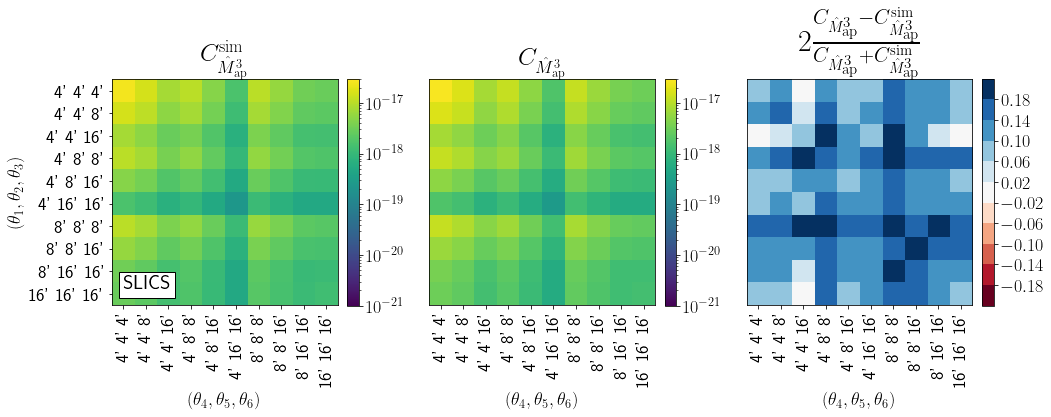

In [18]:
fig, ax=plt.subplots(ncols=3, figsize=(15,6))
#plt.subplots_adjust(hspace=0, wspace=0.04)

vmin=1e-21
vmax=3e-17

cov_tot=(cov_T1inf+cov_T2+cov_T4+cov_T5+cov_T6+cov_T7+cov_ssc)

ax[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)

ax[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)
ax[1].set_yticks([])

ax[2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2].set_xticks(thetas_ticks)
ax[2].set_xticklabels(thetas_labels, rotation=90)
ax[2].set_yticks([])



ax[0].set_title(r"$C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}$", size=25)
im=ax[0].imshow(cov_fft, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(im, ax=ax[0],fraction=0.046, pad=0.04)
ax[0].text(0,N-1, r"SLICS", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


ax[1].set_title(r"$C_{\hat{M}_\mathrm{ap}^3}$", size=25)

fig.colorbar(im, ax=ax[1],fraction=0.046, pad=0.04)

im=ax[1].imshow(cov_tot, norm=LogNorm(vmin=vmin, vmax=vmax))
cmap2=cm.get_cmap('RdBu', 11)
vmin=-0.22
vmax=0.22

ax[2].set_title(r"$2\frac{C_{\hat{M}_\mathrm{ap}^3}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{C_{\hat{M}_\mathrm{ap}^3}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)
cmap=cm.get_cmap('RdBu', 16)
im2=ax[2].imshow(2*(cov_tot-cov_fft)/(cov_tot+cov_fft), vmin=vmin, vmax=vmax, cmap=cmap2)
fig.colorbar(im2, ax=ax[2],fraction=0.046, pad=0.04, ticks=[-0.18, -0.14, -0.10, -0.06, -0.02, 0.02, 0.06, 0.10, 0.14, 0.18])

finalizePlot(ax, outputFn=dir_slics+"/ComparisonSLICS_analytical_simulation.png", showlegend=False)


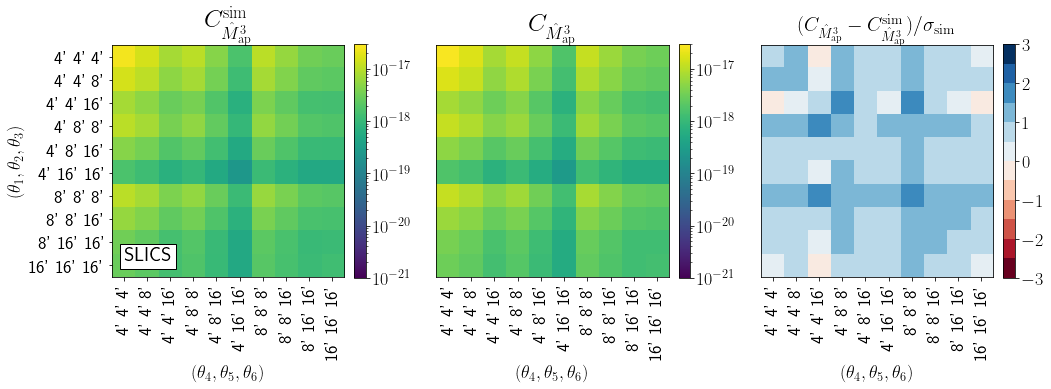

In [19]:
fig, ax=plt.subplots(ncols=3, figsize=(15,6))
#plt.subplots_adjust(hspace=0, wspace=0.04)

vmin=1e-21
vmax=3e-17

cov_tot=(cov_T1inf+cov_T2+cov_T4+cov_T5+cov_T6+cov_T7+cov_ssc)

ax[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)

ax[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)
ax[1].set_yticks([])

ax[2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2].set_xticks(thetas_ticks)
ax[2].set_xticklabels(thetas_labels, rotation=90)
ax[2].set_yticks([])



ax[0].set_title(r"$C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}$", size=25)
im=ax[0].imshow(cov_fft, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(im, ax=ax[0],fraction=0.046, pad=0.04)
ax[0].text(0,N-1, r"SLICS", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


ax[1].set_title(r"$C_{\hat{M}_\mathrm{ap}^3}$", size=25)

fig.colorbar(im, ax=ax[1],fraction=0.046, pad=0.04)

im=ax[1].imshow(cov_tot, norm=LogNorm(vmin=vmin, vmax=vmax))
cmap2=cm.get_cmap('RdBu', 12)
vmin=-3
vmax=3

ax[2].set_title(r"$(C_{\hat{M}_\mathrm{ap}^3}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3})/\sigma_\mathrm{sim}$", size=20)
cmap=cm.get_cmap('RdBu', 16)
im2=ax[2].imshow((cov_tot-cov_fft)/(1.5*err_fft), vmin=vmin, vmax=vmax, cmap=cmap2)

fig.colorbar(im2, ax=ax[2],fraction=0.046, pad=0.04, ticks=[-3,-2, -1,0, 1,2, 3])
finalizePlot(ax, outputFn=dir_slics+"/ComparisonSLICS_analytical_simulation_simError.png", showlegend=False)


# Plot individual terms

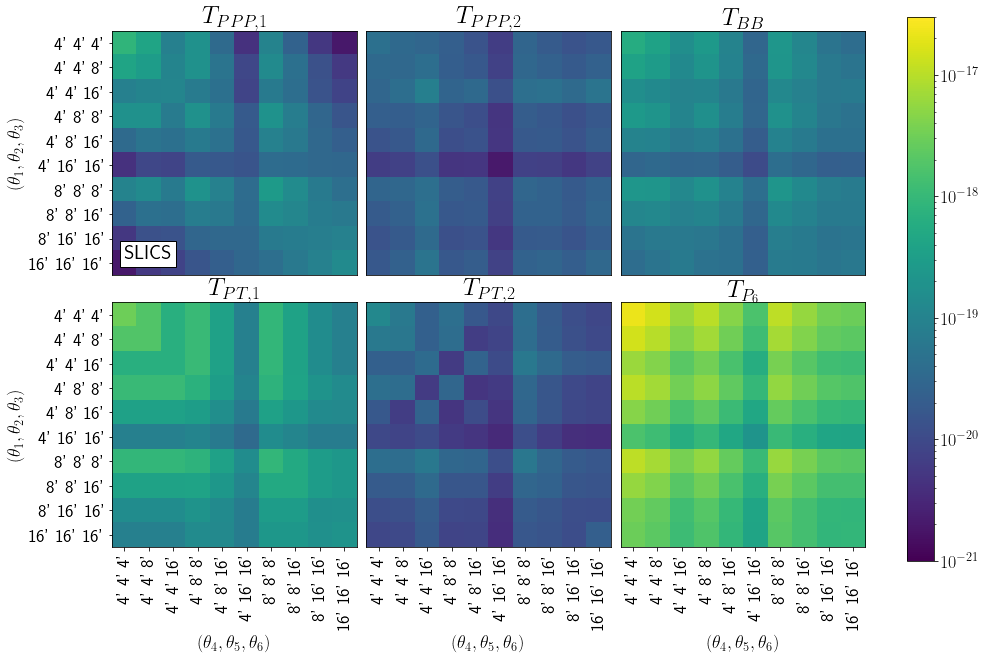

In [20]:
fig, axs=plt.subplots(ncols=3, nrows=2, figsize=(15,10))
plt.subplots_adjust(hspace=0, wspace=0.04)

#plt.subplots_adjust(hspace=0, wspace=0.04)

vmin=1e-21
vmax=3e-17

axs[0,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
axs[0,0].set_yticks(thetas_ticks)
axs[0,0].set_yticklabels(thetas_labels)
axs[0,0].set_xticks([])

axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

axs[1,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
axs[1,0].set_yticks(thetas_ticks)
axs[1,0].set_yticklabels(thetas_labels)
axs[1,0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
axs[1,0].set_xticks(thetas_ticks)
axs[1,0].set_xticklabels(thetas_labels, rotation=90)

axs[1,1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
axs[1,1].set_xticks(thetas_ticks)
axs[1,1].set_xticklabels(thetas_labels, rotation=90)
axs[1,1].set_yticks([])
axs[1,2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
axs[1,2].set_xticks(thetas_ticks)
axs[1,2].set_xticklabels(thetas_labels, rotation=90)
axs[1,2].set_yticks([])



axs[0,0].set_title(r"$T_{PPP, 1}$", size=25)
im=axs[0,0].imshow(cov_T1inf, norm=LogNorm(vmin=vmin, vmax=vmax))

axs[0,0].text(0,N-1, r"SLICS", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


axs[0,1].set_title(r"$T_{PPP, 2}$", size=25)
im=axs[0,1].imshow(cov_T2, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[0,2].set_title(r"$T_{BB}$", size=25)
im=axs[0,2].imshow(cov_T4, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[1,0].set_title(r"$T_{PT, 1}$", size=25)
im=axs[1,0].imshow(cov_T5, norm=LogNorm(vmin=vmin, vmax=vmax))



axs[1,1].set_title(r"$T_{PT, 2}$", size=25)
im=axs[1,1].imshow(cov_T6, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[1,2].set_title(r"$T_{{P_6}}$", size=25)
im=axs[1,2].imshow(cov_T7+cov_ssc, norm=LogNorm(vmin=vmin, vmax=vmax))

#ax[2].set_title(r"$2\frac{C_{\hat{M}_\mathrm{ap}^3}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{C_{\hat{M}_\mathrm{ap}^3}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)

fig.colorbar(im, ax=axs.ravel(), fraction=0.05)
finalizePlot(ax, outputFn=dir_slics+"/ComparisonSLICS_analytical_simulation_individualTerms.png", showlegend=False, tightlayout=False)


# Plot diagonal with individual terms

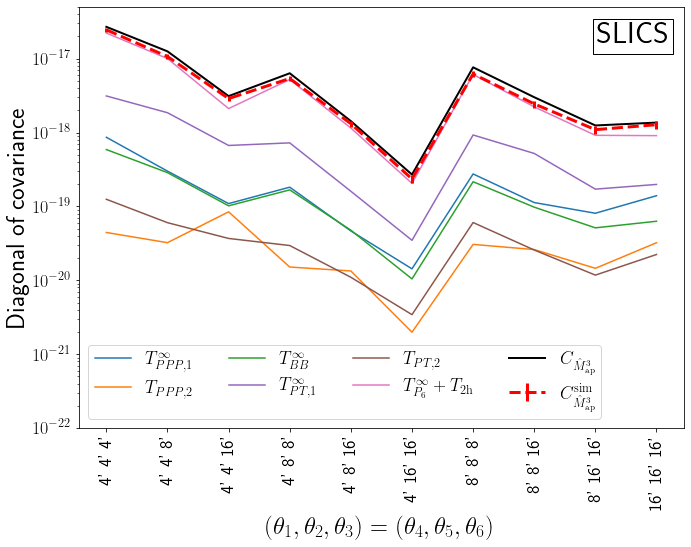

In [21]:
fig, ax=plt.subplots(figsize=(10,8))

#colors=cm.viridis_r(np.linspace(0.2, 1, 6))
#colors=cm.brg(np.linspace(0, 1, 6))
colors=cm.tab10([0,1,2,4,5,6])


#ax.set_title(r"Diagonal of covariance of $\langle M_\mathrm{ap}^3\rangle$ for SLICS")
ax.set_xlabel(r'$(\theta_1, \theta_2, \theta_3)=(\theta_4, \theta_5, \theta_6)$', size=25)
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)
ax.set_yscale('log')
ax.set_ylim(1e-22, 5e-17)
ax.set_ylabel("Diagonal of covariance", size=25)
ax.plot(np.diag(cov_T1inf), label=r'$T_{PPP, 1}^\infty$', ls='-', color=colors[0])
ax.plot(np.diag(cov_T2), label=r'$T_{PPP, 2}$', ls='-', color=colors[1])
ax.plot(np.diag(cov_T4), label=r'$T_{BB}^\infty$', ls='-', color=colors[2])
ax.plot(np.diag(cov_T5), label=r'$T_{PT, 1}^\infty$', ls='-', color=colors[3])
ax.plot(np.diag(cov_T6), label=r'$T_{PT, 2}$', ls='-', color=colors[4])
ax.plot(np.diag(cov_T7+cov_ssc), label=r'$T_{{P_6}}^\infty+T_\mathrm{2h}$', ls='-', color=colors[5])
ax.plot(np.diag(cov_tot), label=r'$C_{\hat{M}_\mathrm{ap}^3}$', color='k', lw=2)
ax.errorbar(range(N),np.diag(cov_fft), yerr=np.diag(err_fft), label=r'$C_{\hat{M}_\mathrm{ap}^3}^\mathrm{sim}$', color='red', ls='--', lw=3)
ax.text(N-0.8, 3e-17, r"SLICS", bbox=dict(facecolor='white'), horizontalalignment='right', verticalalignment='top', size=30)



#ax.legend(bbox_to_anchor=(1, 1.03))

finalizePlot(ax, outputFn=dir_slics+"/ComparisonSLICS_analytical_simulation_individualTerms_diagonal.png", showlegend=True, legendcols=4)


# Ti Plot

[0, 1, 2, 4, 5, 7, 10, 11, 13, 16]


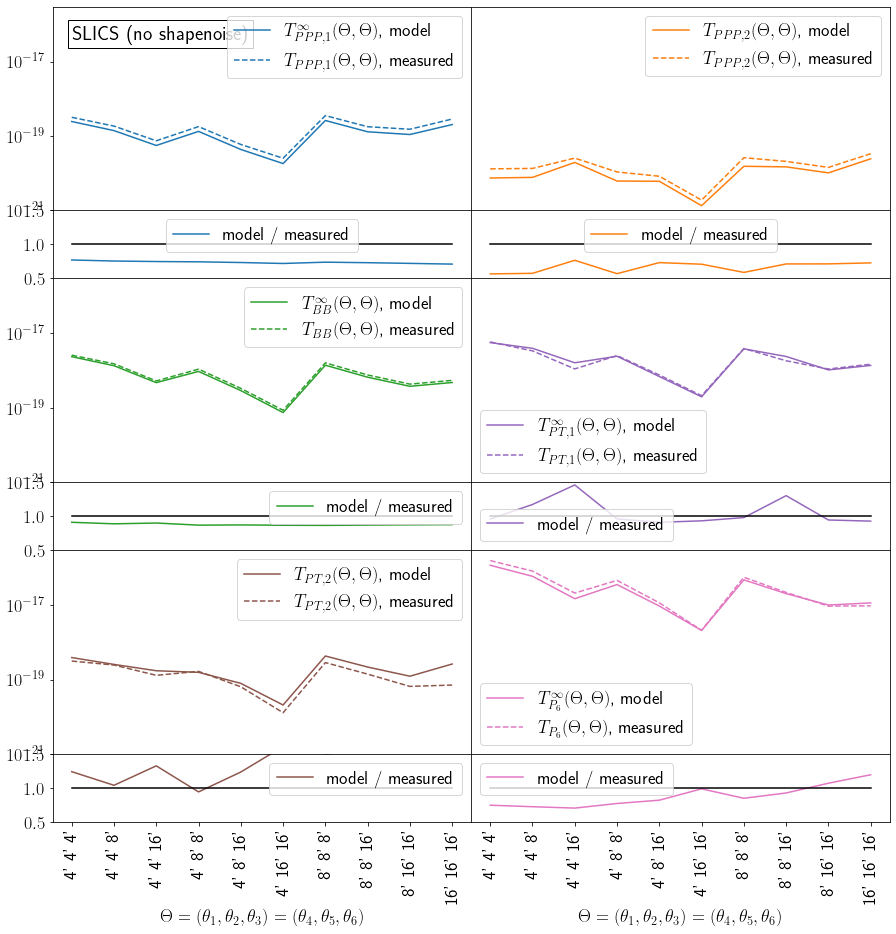

In [22]:
ix=[]
N_meas=4
count=0
for i in range(N_meas):
    for j in range(i, N_meas):
        for k in range(j, N_meas):
            if (i>=0) and (i<3) and (j>=0) and (j<3) and (k>=0) and (k<3):
                ix.append(count)
            count+=1

print(ix)
#ix=range(20)
dir_ti="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Ti_from_SLICS/"
cov_T1inf_meas=np.loadtxt(dir_ti+"T_1_measured_singlez.dat")[ix,:][:,ix]
cov_T2_meas=np.loadtxt(dir_ti+"T_2_measured_singlez.dat")[ix,:][:,ix]
cov_T4_meas=np.loadtxt(dir_ti+"T_4_measured_singlez.dat")[ix,:][:,ix]
cov_T5_meas=np.loadtxt(dir_ti+"T_5_measured_singlez.dat")[ix,:][:,ix]
cov_T6_meas=np.loadtxt(dir_ti+"T_6_measured_singlez.dat")[ix,:][:,ix]
cov_T7_meas=np.loadtxt(dir_ti+"T_7_measured_singlez.dat")[ix,:][:,ix]

#cov_T7_meas=cov_fft-cov_T1inf_meas-cov_T2_meas-cov_T4_meas-cov_T5_meas-cov_T6_meas

dir_ti_mod="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_singleZ/"
cov_T1inf=np.loadtxt(dir_ti_mod+"cov_infinite_term1Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]
cov_T2=np.loadtxt(dir_ti_mod+"cov_square_term2Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]

cov_T4=np.loadtxt(dir_ti_mod+"cov_infinite_term4Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]
  

cov_T5=np.loadtxt(dir_ti_mod+"cov_infinite_term5Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]


cov_T6=np.loadtxt(dir_ti_mod+"cov_square_term6Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]


cov_T7=np.loadtxt(dir_ti_mod+"cov_infinite_term7Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]

fig, axs=plt.subplots(nrows=6, ncols=2, sharex=True, figsize=(15,15), gridspec_kw={'height_ratios':[3,1,3,1,3,1]})
plt.subplots_adjust(hspace=0, wspace=0)
#for ax in axs.ravel():
    #ax.set_ylim((1e-21, 3e-17))
#    ax.set_yscale('log')

a=1


axs[0,0].set_ylim((1e-21, 3e-16))
axs[0,0].set_yscale('log')
axs[0,0].plot(np.diag(cov_T1inf*a), label=r"$T^\infty_{PPP, 1}(\Theta, \Theta)$, model", color=colors[0])
axs[0,0].plot(np.diag(cov_T1inf_meas), label=r"$T_{PPP, 1}(\Theta, \Theta)$, measured", ls='--', color=colors[0])
axs[0,0].legend()

axs[0,0].text(0, 1e-16, r"SLICS (no shapenoise)", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='top', size=20)

axs[1,0].set_ylim((0.5,1.5))
axs[1,0].plot(np.diag(cov_T1inf*a)/np.diag(cov_T1inf_meas), color=colors[0], label='model / measured')
axs[1,0].plot(np.ones_like(np.diag(cov_T2)), color='k')
axs[1,0].legend()


axs[0,1].set_ylim((1e-21, 3e-16))
axs[0,1].set_yscale('log')
axs[0,1].plot(np.diag(cov_T2*a), label=r"$T_{PPP,2}(\Theta, \Theta)$, model", color=colors[1])
axs[0,1].plot(np.diag(cov_T2_meas), label=r"$T_{PPP,2}(\Theta, \Theta)$, measured", ls='--', color=colors[1])
axs[0,1].legend()

axs[1,1].set_ylim((0.5,1.5))
axs[1,1].plot(np.diag(cov_T2*a)/np.diag(cov_T2_meas), color=colors[1], label='model / measured')
axs[1,1].plot(np.ones_like(np.diag(cov_T2)), color='k')
axs[1,1].legend()
#ax[1,0].set_xticks([])


axs[2,0].set_ylim((1e-21, 3e-16))
axs[2,0].set_yscale('log')
axs[2,0].plot(np.diag(cov_T4*a), label=r"$T^\infty_{BB}(\Theta, \Theta)$, model", color=colors[2])
axs[2,0].plot(np.diag(cov_T4_meas), label=r"$T_{BB}(\Theta, \Theta)$, measured", ls='--', color=colors[2])
axs[2,0].legend()

axs[3,0].set_ylim((0.5,1.5))
axs[3,0].plot(np.diag(cov_T4*a)/np.diag(cov_T4_meas), color=colors[2], label='model / measured')
axs[3,0].plot(np.ones_like(np.diag(cov_T2)), color='k')
axs[3,0].legend()


axs[2,1].set_ylim((1e-21, 3e-16))
axs[2,1].set_yscale('log')
axs[2,1].plot(np.diag(cov_T5*a), label=r"$T^\infty_{PT,1}(\Theta, \Theta)$, model", color=colors[3])
axs[2,1].plot(np.diag(cov_T5_meas), label=r"$T_{PT,1}(\Theta, \Theta)$, measured", ls='--', color=colors[3])
axs[2,1].legend()

axs[3,1].set_ylim((0.5,1.5))
axs[3,1].plot(np.diag(cov_T5*a)/np.diag(cov_T5_meas), color=colors[3], label='model / measured')
axs[3,1].plot(np.ones_like(np.diag(cov_T2)), color='k')
axs[3,1].legend()


axs[4,0].set_ylim((1e-21, 3e-16))
axs[4,0].set_yscale('log')
axs[4,0].plot(np.diag(cov_T6*a*np.pi), label=r"$T_{PT,2}(\Theta, \Theta)$, model", color=colors[4])
axs[4,0].plot(np.diag(cov_T6_meas), label=r"$T_{PT,2}(\Theta, \Theta)$, measured", ls='--', color=colors[4])
axs[4,0].legend()


axs[5,0].set_ylim((0.5,1.5))
axs[5,0].plot(np.diag(cov_T6*a*np.pi)/np.diag(cov_T6_meas), color=colors[4], label='model / measured')
axs[5,0].plot(np.ones_like(np.diag(cov_T2)), color='k')
axs[5,0].legend()


axs[4,1].set_ylim((1e-21, 3e-16))
axs[4,1].set_yscale('log')
axs[4,1].plot(np.diag(cov_T7*a+10*cov_ssc*a), label=r"$T^\infty_{{P_6}}(\Theta, \Theta)$, model", color=colors[5])
axs[4,1].plot(np.diag(cov_T7_meas), label=r"$T_{{P_6}}(\Theta, \Theta)$, measured", ls='--', color=colors[5])
axs[4,1].legend()


axs[5,1].set_ylim((0.5,1.5))
axs[5,1].plot(np.diag(cov_T7*a+10*cov_ssc*a)/np.diag(cov_T7_meas), color=colors[5], label='model / measured')
axs[5,1].plot(np.ones_like(np.diag(cov_T2)), color='k')
axs[5,1].legend()


for i in range(6):
    axs[i, 1].set_yticks([])
    axs[i, 0].set_xticks([])
    axs[i, 1].set_xticks([])


axs[5,0].set_xlabel(r'$\Theta=(\theta_1, \theta_2, \theta_3)=(\theta_4, \theta_5, \theta_6)$')
axs[5,0].set_xticks(thetas_ticks)
axs[5,0].set_xticklabels(thetas_labels, rotation=90)

axs[5,1].set_xlabel(r'$\Theta=(\theta_1, \theta_2, \theta_3)=(\theta_4, \theta_5, \theta_6)$')
axs[5,1].set_xticks(thetas_ticks)
axs[5,1].set_xticklabels(thetas_labels, rotation=90)

finalizePlot(ax, outputFn=dir_slics+"/ComparisonSLICS_Ti.png", tightlayout=False, showlegend=False)


[0, 1, 2, 4, 5, 7, 10, 11, 13, 16]


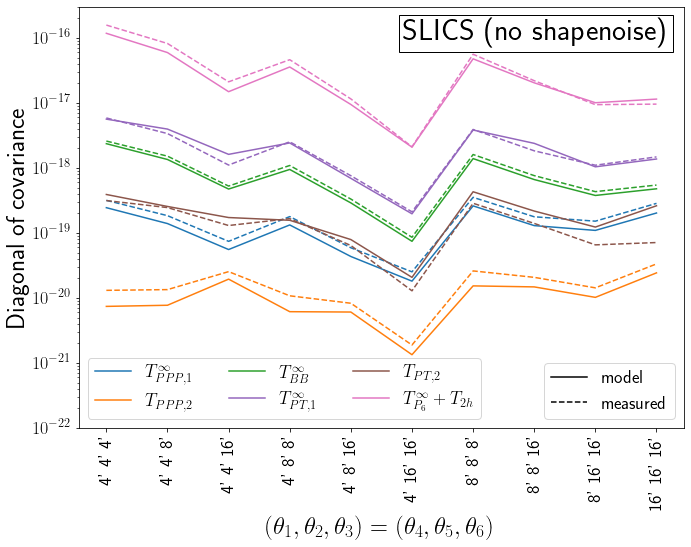

'/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16//ComparisonSLICS_Ti_singlePlot.png'

In [26]:
ix=[]
N_meas=4
count=0
for i in range(N_meas):
    for j in range(i, N_meas):
        for k in range(j, N_meas):
            if (i>=0) and (i<3) and (j>=0) and (j<3) and (k>=0) and (k<3):
                ix.append(count)
            count+=1

print(ix)
#ix=range(20)
dir_ti="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Ti_from_SLICS/"
cov_T1inf_meas=np.loadtxt(dir_ti+"T_1_measured_singlez.dat")[ix,:][:,ix]
cov_T2_meas=np.loadtxt(dir_ti+"T_2_measured_singlez.dat")[ix,:][:,ix]
cov_T4_meas=np.loadtxt(dir_ti+"T_4_measured_singlez.dat")[ix,:][:,ix]
cov_T5_meas=np.loadtxt(dir_ti+"T_5_measured_singlez.dat")[ix,:][:,ix]
cov_T6_meas=np.loadtxt(dir_ti+"T_6_measured_singlez.dat")[ix,:][:,ix]
cov_T7_meas=np.loadtxt(dir_ti+"T_7_measured_singlez.dat")[ix,:][:,ix]

#cov_T7_meas=cov_fft-cov_T1inf_meas-cov_T2_meas-cov_T4_meas-cov_T5_meas-cov_T6_meas

dir_ti_mod="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_singleZ/"
cov_T1inf=np.loadtxt(dir_ti_mod+"cov_infinite_term1Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]
cov_T2=np.loadtxt(dir_ti_mod+"cov_square_term2Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]

cov_T4=np.loadtxt(dir_ti_mod+"cov_infinite_term4Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]
  

cov_T5=np.loadtxt(dir_ti_mod+"cov_infinite_term5Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]


cov_T6=np.loadtxt(dir_ti_mod+"cov_square_term6Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]


cov_T7=np.loadtxt(dir_ti_mod+"cov_infinite_term7Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")[ix,:][:,ix]

fig, axs=plt.subplots(figsize=(10,8))
plt.subplots_adjust(hspace=0, wspace=0)

a=1


axs.set_ylim((1e-22, 3e-16))
axs.set_yscale('log')
axs.plot(np.diag(cov_T1inf*a), label=r"$T^\infty_{PPP, 1}$", color=colors[0])
axs.plot(np.diag(cov_T1inf_meas),  ls='--', color=colors[0])
axs.plot(np.diag(cov_T2*a), label=r"$T_{PPP,2}$", color=colors[1])
axs.plot(np.diag(cov_T2_meas),  ls='--', color=colors[1])
axs.plot(np.diag(cov_T4*a), label=r"$T^\infty_{BB}$", color=colors[2])
axs.plot(np.diag(cov_T4_meas),  ls='--', color=colors[2])
axs.plot(np.diag(cov_T5*a), label=r"$T^\infty_{PT,1}$", color=colors[3])
axs.plot(np.diag(cov_T5_meas),  ls='--', color=colors[3])
axs.plot(np.diag(cov_T6*a*np.pi), label=r"$T_{PT,2}$", color=colors[4])
axs.plot(np.diag(cov_T6_meas), ls='--', color=colors[4])
axs.plot(np.diag(cov_T7*a+10*cov_ssc*a), label=r"$T^\infty_{{P_6}}+T_{2h}$", color=colors[5])
axs.plot(np.diag(cov_T7_meas),  ls='--', color=colors[5])
#axs.legend()

axs.text(N-0.8, 2e-16, r"SLICS (no shapenoise)", bbox=dict(facecolor='white'), horizontalalignment='right', verticalalignment='top', size=30)


axs.set_xlabel(r'$(\theta_1, \theta_2, \theta_3)=(\theta_4, \theta_5, \theta_6)$', size=25)
axs.set_xticks(thetas_ticks)
axs.set_xticklabels(thetas_labels, rotation=90)
axs.set_ylabel("Diagonal of covariance", size=25)
#axs[1].set_ylabel(r"model / measured")

l1=plt.Line2D([0,0], [0,0], color='k', linestyle='-')
l2=plt.Line2D([0,0], [0,0], color='k', linestyle='--')


legend2=plt.legend([l1,l2], ["model", "measured"], loc='lower right')
fig.gca().add_artist(legend2)



finalizePlot(ax, outputFn=dir_slics+"/ComparisonSLICS_Ti_singlePlot.png", legendcols=3, loc_legend="lower left")
dir_slics+"/ComparisonSLICS_Ti_singlePlot.png"